# Program 01

In [1]:
import pandas as pd
import os
print(os.path.abspath('../'))
file_path = os.path.abspath('../Lab 15/')
print(file_path)
train = pd.read_csv(file_path+'/train_income_data_AAII.csv')
test = pd.read_csv(file_path+'/train_income_data_AAII.csv')

C:\Users\Wassay\Desktop
C:\Users\Wassay\Desktop\Lab 15


# Program 02

In [2]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Program 03

In [3]:
#shape is just an attribute, not a method. Use name.shape instead of name.shape().
train.shape

(32561, 12)

# Program 04

In [4]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

# Program 05

In [5]:
categorical_var = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_var)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


# Program 06

In [6]:
train[categorical_var].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

# Program 07

In [7]:
train['Workclass'].unique()
len(train['Workclass'].unique())

9

# Program 08

In [8]:
train['Race'].unique()
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

# Program 09

In [9]:
train['Native.Country'].value_counts() 
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

# Program 10

In [10]:
cross_tab = pd.crosstab(train['Sex'],train['Income.Group'],margins=True) 
cross_tab

Income.Group,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


# Program 11

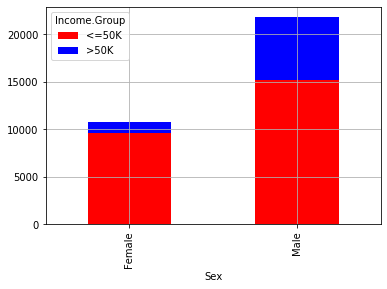

In [11]:
%matplotlib inline 
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=True)

# Program 12

In [12]:
def convert_percent(ct_val):
    return ct_val/float(ct_val[-1])
cross_tab2 =cross_tab.apply(convert_percent,axis=1)
cross_tab2

Income.Group,<=50K,>50K,All
Sex,,,
Female,0.890539,0.109461,1.0
Male,0.694263,0.305737,1.0
All,0.759190,0.240810,1.0


# Program 13

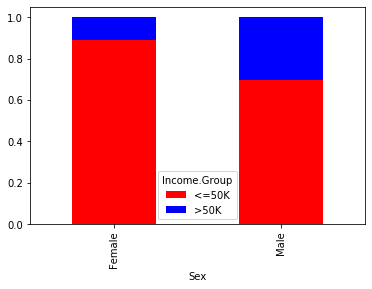

In [13]:
cross_tab2.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

# Program 14

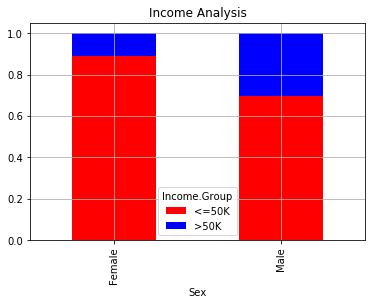

In [14]:
cross_tab2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=True, title='Income Analysis')

# Program 15

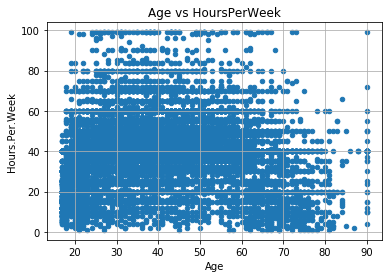

In [15]:
train.plot('Age','Hours.Per.Week',kind='Scatter', grid=True, title='Age vs HoursPerWeek')

# Program 16

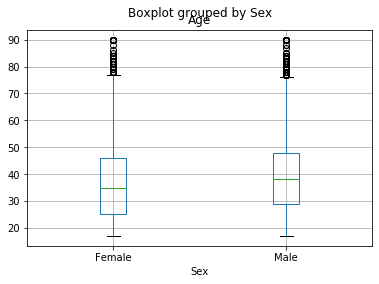

In [16]:
train.median()
train.boxplot(column='Age',by='Sex')

# Program 17

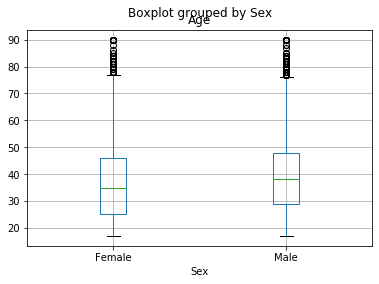

In [17]:
train.boxplot(column='Age',by='Sex')

# Program 18

In [18]:
df_male = train.loc[train['Sex']=='Male']
df_male.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
7,8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [19]:
df_male.median()

ID                16250.5
Age                  38.0
Hours.Per.Week       40.0
dtype: float64

In [20]:
df_male.describe()

,ID,Age,Hours.Per.Week
count,21790.000000,21790.000000,21790.000000
mean,16264.666223,39.433547,42.428086
std,9412.830322,13.370630,12.119755
min,1.000000,17.000000,1.000000
25%,8124.250000,29.000000,40.000000
50%,16250.500000,38.000000,40.000000
75%,24421.750000,48.000000,49.000000
max,32560.000000,90.000000,99.000000


# Program 19

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
def make_chart_simple_line_chart(plt):
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
    plt.title('Nominal GDP')
    plt.ylabel('Billions of $')
    plt.show()

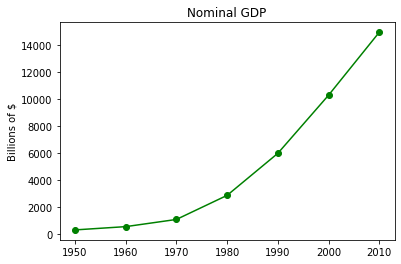

In [22]:
make_chart_simple_line_chart(plt)

From graph we observe that the gdp is increasing with every passing decade.

# Practice with Graphs:

## 01.

In [23]:
def make_chart_simple_bar_chart(plt):
    movies = ['Annie Hall', 'Ben-Hur', 'Casabianca', 'Gandhi', 'West Side Story']
    num_oscars = [5, 22, 3, 8, 10]
    xs = [i + 0.1 for i, _ in enumerate(movies)]
    plt.bar(xs, num_oscars)
    plt.ylabel('# of Academy Awards')
    plt.title('My Favourite Movies')
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    plt.show()

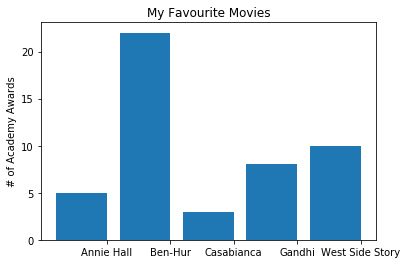

In [24]:
make_chart_simple_bar_chart(plt)

## 02.

In [25]:
def make_chart_histogram(plt):
    grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)
    #print(histogram)
    plt.bar([x - 4 for x in histogram.keys()], histogram.values(), 8)
    plt.axis([-5, 105, 0, 5])
    plt.xticks([10 * i for i in range(11)])
    plt.xlabel('Decile')
    plt.ylabel('# of Students')
    plt.title('Distribution of Exam 1 Grades')
    plt.show()

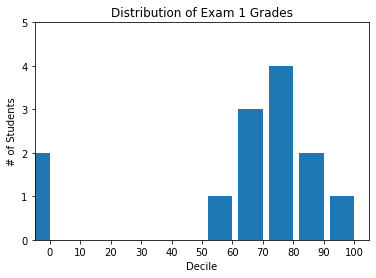

In [26]:
make_chart_histogram(plt)

## 03.

In [27]:
def make_chart_several_line_charts(plt):
    variance = [1,2,4,8,16,32,64,128,256]
    bias_squarred = [256,128,64,32,16,8,4,2,1]
    total_error = [x + y for x,y in zip(variance, bias_squarred)]
    xs = range(len(variance))
    plt.plot(xs, variance, 'g-', label='variance')
    plt.plot(xs, bias_squarred, 'r-.', label='bias^2')
    plt.plot(xs, total_error, 'b:', label='total_error')
    plt.legend(loc=9)
    plt.xlabel('Model of Complexity')
    plt.title('The Bias-Variance Tradeoff')
    plt.show()

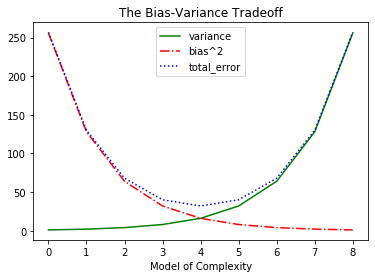

In [28]:
make_chart_several_line_charts(plt)

## 04.

In [29]:
def make_chart_scatter_plt(plt):
    friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 150, 145, 190]
    label = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    plt.scatter(friends, minutes)
    for label, friend_count, minute_count in zip(label, friends, minutes):
        plt.annotate(label, xy=(friend_count, minute_count), xytext=(5, -5), textcoords='offset points')
    plt.title('Daily Minutes vs. Number of Friends')
    plt.xlabel('# of friends')
    plt.ylabel('daily minutes spent on site')
    plt.show()

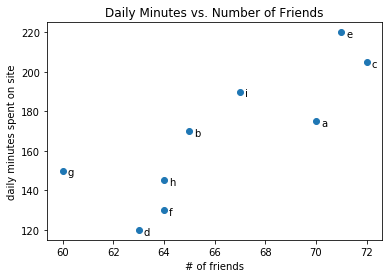

In [30]:
make_chart_scatter_plt(plt)